### This notebook is tutorial using chain ai and a cv reader at the end using OpenRouter and Azure for Embeddings and fiass.

In [ ]:
%pip install chain-ai

### Helpers

In [110]:
from IPython.display import display, Markdown
def display_markdown(text: str):
    display(Markdown(text))

## Chat Models

### OpenRouter

In [80]:
from chain.chat_models import OpenRouterConfig, OpenRouterChatModel

# 1. configure the llm
llm = OpenRouterChatModel(
    config=OpenRouterConfig(model="qwen/qwen2.5-vl-72b-instruct:free" )
)


In [81]:
text = llm.invoke("Who is the strongest Hashira ?")
display_markdown(text)

In the anime and manga series Demon Slayer: Kimetsu no Yaiba, the Hashira are the nine most powerful demon slayers in the organization. Determining who is the "strongest" Hashira is subjective and can depend on various factors. However, based on the information provided in the series, here are some of the most powerful Hashira:

1. Muzan Kibutsuji: Although not a Hashira, he is the main antagonist and the strongest demon in the series.

2. Kyojuro Rengoku: Known as the Flame Hashira, he is considered one of the strongest Hashira and has a powerful breathing technique.

3. Giyu Tomioka: The Water Hashira, he is known for his strategic thinking and powerful water breathing technique.

4. Inosuke Hashibira: The Beast Hashira, he is known for his incredible strength and agility.

5. Tanjiro Kamado: Although not a Hashira, he is the main protagonist and has shown incredible potential and strength.

It's important to note that the strength of a Hashira can depend on various factors such as their breathing technique, experience, and personal growth throughout the series.

# Messages

In [82]:
from chain.core import HumanMessage, SystemMessage, AIMessage

messages = [
    SystemMessage(content="You are a helpful assistant."),
    HumanMessage(content="Who are you?"),
    AIMessage(content="I am a helpful assistant."),
    HumanMessage(content="What is the capital of France?"),
]

display_markdown(llm.invoke(messages))

The capital of France is Paris.

# Message Template

In [83]:
from chain.prompts import PromptTemplate

prompt_template = PromptTemplate.from_template(template="Tell me a joke about {{ topic }}", input_variables=["topic"])

prompt =prompt_template.invoke({"topic": "cats"})

llm.invoke(prompt)


'Why did the cat join a gym?\n\nTo get some mewscle!'

In [ ]:
    from chain.prompts import PromptTemplate, FewShotPromptTemplate

    # Define the example template
    example_prompt = PromptTemplate(template="Question: {{ question }}\n{{ answer }}", input_variables=["question", "answer"])

    # Few-shot examples
    examples = [
        {
            "question": "Who lived longer, Muhammad Ali or Alan Turing?",
            "answer": """
        Are follow up questions needed here: Yes.
        Follow up: How old was Muhammad Ali when he died?
        Intermediate answer: Muhammad Ali was 74 years old when he died.
        Follow up: How old was Alan Turing when he died?
        Intermediate answer: Alan Turing was 41 years old when he died.
        So the final answer is: Muhammad Ali
        """,
        },
        {
            "question": "When was the founder of craigslist born?",
            "answer": """
        Are follow up questions needed here: Yes.
        Follow up: Who was the founder of craigslist?
        Intermediate answer: Craigslist was founded by Craig Newmark.
        Follow up: When was Craig Newmark born?
        Intermediate answer: Craig Newmark was born on December 6, 1952.
        So the final answer is: December 6, 1952
        """,
        },
        {
            "question": "Who was the maternal grandfather of George Washington?",
            "answer": """
        Are follow up questions needed here: Yes.
        Follow up: Who was the mother of George Washington?
        Intermediate answer: The mother of George Washington was Mary Ball Washington.
        Follow up: Who was the father of Mary Ball Washington?
        Intermediate answer: The father of Mary Ball Washington was Joseph Ball.
        So the final answer is: Joseph Ball
        """,
        },
        {
            "question": "Are both the directors of Jaws and Casino Royale from the same country?",
            "answer": """
        Are follow up questions needed here: Yes.
        Follow up: Who is the director of Jaws?
        Intermediate Answer: The director of Jaws is Steven Spielberg.
        Follow up: Where is Steven Spielberg from?
        Intermediate Answer: The United States.
        Follow up: Who is the director of Casino Royale?
        Intermediate Answer: The director of Casino Royale is Martin Campbell.
        Follow up: Where is Martin Campbell from?
        Intermediate Answer: New Zealand.
        So the final answer is: No
        """,
        },
    ]


    # FewShotPromptTemplate with correct Jinja2-style suffix
    prompt = FewShotPromptTemplate(
        examples=examples,
        example_prompt=example_prompt,
        suffix="Question: {{ user_input }}",
        input_variables=["user_input"]
    )

    # Render the final prompt
    prompt = prompt.format(user_input="Who was the father of Killua Zoldyck?")
    print(prompt)
    display_markdown(llm.invoke(prompt))

Question: Who lived longer, Muhammad Ali or Alan Turing?

    Are follow up questions needed here: Yes.
    Follow up: How old was Muhammad Ali when he died?
    Intermediate answer: Muhammad Ali was 74 years old when he died.
    Follow up: How old was Alan Turing when he died?
    Intermediate answer: Alan Turing was 41 years old when he died.
    So the final answer is: Muhammad Ali
    

Question: When was the founder of craigslist born?

    Are follow up questions needed here: Yes.
    Follow up: Who was the founder of craigslist?
    Intermediate answer: Craigslist was founded by Craig Newmark.
    Follow up: When was Craig Newmark born?
    Intermediate answer: Craig Newmark was born on December 6, 1952.
    So the final answer is: December 6, 1952
    

Question: Who was the maternal grandfather of George Washington?

    Are follow up questions needed here: Yes.
    Follow up: Who was the mother of George Washington?
    Intermediate answer: The mother of George Washington wa

Are follow up questions needed here: Yes.
Follow up: Who is Killua Zoldyck?
Intermediate answer: Killua Zoldyck is a fictional character from the anime and manga series "Hunter x Hunter," created by Yoshihiro Togashi.
Follow up: What is the name of Killua Zoldyck's father in the "Hunter x Hunter" series?
Intermediate answer: Killua Zoldyck's father is named Silva Zoldyck.
So the final answer is: Silva Zoldyck

In [85]:
llm.invoke("Write article in Arabic about LangChain")

'لقد طلبت مني كتابة مقال باللغة العربية عن LangChain، ولكن لم يتم تزويدي بمعلومات محددة أو مصادر موثوقة حول هذا الموضوع. لذا، سأقدم لك مقالًا عامًا عن LangChain باللغة العربية بناءً على المعلومات المتاحة علنًا:\n\nعنوان المقال: لانجشين: تقنية جديدة في مجال الذكاء الاصطناعي\n\nلأنجشين (LangChain) هي تقنية حديثة في مجال الذكاء الاصطناعي تهدف إلى تحسين وتطوير نماذج اللغة الطبيعية. تستخدم هذه التقنية سلاسل من النصوص والبيانات لتحسين فهم وتحليل اللغة الطبيعية.\n\nتعتمد لانجشين على مفهوم "السلاسل" حيث يتم ربط سلسلة من النصوص والبيانات معًا لتكوين سياق متكامل. هذا يساعد في تحسين فهم النماذج للغة الطبيعية وتعزيز قدرتها على إنتاج نتائج أكثر دقة وموثوقية.\n\nتتميز لانجشين بعدة مزايا منها:\n1. تحسين فهم السياق اللغوي\n2. زيادة دقة الترجمة الآلية\n3. تحسين قدرات التلخيص والخلاصات\n4. تطوير مهارات التفاعل مع المستخدمين\n\nرغم أن لانجشين تعد تقنية واعدة في مجال الذكاء الاصطناعي، إلا أنها لا تزال في مراحل تطويرها الأولى. يتعين على الباحثين والمطورين مواصلة العمل لتحسين هذه التقنية وتوسيع نطاق تطبيقات

#### using Stream

In [86]:

display_handle = display(Markdown(""), display_id=True)
result = ""
for chunk in llm.stream("Write article in Arabic about LangChain and Mathimatics?"):
    result += chunk
    display_handle.update(Markdown(result)) # type: ignore

عنوان المقال: لانجشين و الرياضيات: تكامل التكنولوجيا والعلم

في عالم التكنولوجيا المتطور، تلعب لانجشين (LangChain) دورًا مهمًا في تحسين تجربة المستخدم وتسهيل الوصول إلى المعلومات. وتعتبر الرياضيات من العلوم الأساسية التي تدعم تطوير لانجشين وتحسين أدائها. في هذا المقال، سنستكشف العلاقة بين لانجشين والرياضيات وكيف يمكن أن يتكاملان معًا لتقديم تجربة مستخدم متميزة.

لانجشين هي تقنية تستخدم في مجال الذكاء الاصطناعي وتعلم الآلة لتحسين تجربة المستخدم في البحث عن المعلومات. تهدف لانجشين إلى تحسين فهم اللغة الطبيعية وتقديم نتائج بحث دقيقة وذات صلة للمستخدم. وتعتمد لانجشين على مجموعة من الخوارزميات والتقنيات الرياضية لتحليل البيانات وفهم سياق البحث.

الرياضيات تلعب دورًا مهمًا في تطوير لانجشين وتحسين أدائها. تستخدم لانجشين مجموعة من النماذج الرياضية والخوارزميات لتحليل البيانات وفهم سياق البحث. تساعد هذه النماذج والخوارزميات في تحديد العلاقات بين الكلمات والعبارات وفهم معانيها في سياق البحث. كما تساعد في تحليل البيانات الكبيرة وتحديد الأنماط والاتجاهات في البيانات.

تعتمد لانجشين على مجموعة من النماذج الرياضية مثل نماذج التعلم العميق والشبكات العصبية لتحليل البيانات وفهم سياق البحث. تستخدم هذه النماذج الرياضية في تحليل البيانات وتحديد العلاقات بين الكلمات والعبارات وفهم معانيها في سياق البحث. كما تساعد في تحليل البيانات الكبيرة وتحديد الأنماط والاتجاهات في البيانات.

كما تستخدم لانجشين مجموعة من الخوارزميات الرياضية مثل خوارزميات التعلم الآلي والخوارزميات الإحصائية لتحسين تجربة المستخدم. تساعد هذه الخوارزميات في تحليل البيانات وتحديد الأنماط والاتجاهات في البيانات وتقديم نتائج بحث دقيقة وذات صلة للمستخدم. كما تساعد في تحسين فهم اللغة الطبيعية وتقديم نتائج بحث ذات صلة ودقة عالية.

في الختام، تعتبر لانجشين والرياضيات من العلوم الأساسية التي تدعم تطوير تكنولوجيا البحث عن المعلومات وتحسين تجربة المستخدم. تساعد لانجشين في تحسين فهم اللغة الطبيعية وتقديم نتائج بحث دقيقة وذات صلة للمستخدم. كما تساعد الرياضيات في تطوير لانجشين وتحسين أدائها من خلال استخدام مجموعة من النماذج الرياضية والخوارزميات لتحليل البيانات وفهم سياق البحث.

In [87]:
from chain import BaseModel, Field
from chain.output_parsers import PydanticOutputParser
from chain.prompts import PromptTemplate

class Joke(BaseModel):
    """A structured representation of a joke."""
    setup: str = Field(description="The setup or question part of the joke.")
    punchline: str = Field(description="The punchline or answer to the joke.")

parser = PydanticOutputParser(pydantic_object=Joke)

prompt = PromptTemplate(
    template="Answer the user query.\n{{ format_instructions }}\n{{ query }}\n",
    input_variables=["query"],
    partial_variables={"format_instructions": parser.get_format_instructions()},
)

joke_query = "Tell me a joke about a programmer."

chain = prompt | llm | parser  # type: ignore

chain.invoke({"query": joke_query})


Joke(setup='Why do programmers always mix up Christmas and Halloween?', punchline='Because Oct 31 equals Dec 25.')

In [88]:
from chain.text_splitters import RecursiveCharacterTextSplitter


# Load example document
with open("datasets/story.txt") as f:
    state_of_the_union = f.read()

text_splitter = RecursiveCharacterTextSplitter(
    # Set a really small chunk size, just to show.
    chunk_size=100,
    chunk_overlap=20,
    length_function=len,
)
texts = text_splitter.create_documents([state_of_the_union])
print(texts[0])
print("-------------------")
print(texts[1])
print("-------------------")
print(texts[2])

page_content='Title: The Chronicle of Elderglen

Part I: The Whispering Woods'
-------------------
page_content='In the year of our Lord 1065, before the Norman banners flew over England, nestled amidst the'
-------------------
page_content='nestled amidst the rolling green hills of Wessex, there lay a village known as Elderglen.'


### Embeddings

In [89]:
from chain.embeddings import AzureOpenAIEmbeddings

embeddings = AzureOpenAIEmbeddings(
    deployment_name="text-embedding-3-large",
)

### Vector Store

In [ ]:
%pip install "chain-ai[local]"

In [91]:
from uuid import uuid4
from chain.vectors import FAISSVectorStore
from chain.core.types import Document

document_1 = Document(
    page_content="I had chocolate chip pancakes and scrambled eggs for breakfast this morning.",
    metadata={"source": "tweet"},
)

document_2 = Document(
    page_content="The weather forecast for tomorrow is cloudy and overcast, with a high of 62 degrees.",
    metadata={"source": "news"},
)

document_3 = Document(
    page_content="Building an exciting new project with LangChain - come check it out!",
    metadata={"source": "tweet"},
)

document_4 = Document(
    page_content="Robbers broke into the city bank and stole $1 million in cash.",
    metadata={"source": "news"},
)

document_5 = Document(
    page_content="Wow! That was an amazing movie. I can't wait to see it again.",
    metadata={"source": "tweet"},
)

document_6 = Document(
    page_content="Is the new iPhone worth the price? Read this review to find out.",
    metadata={"source": "website"},
)

document_7 = Document(
    page_content="The top 10 soccer players in the world right now.",
    metadata={"source": "website"},
)

document_8 = Document(
    page_content="LangGraph is the best framework for building stateful, agentic applications!",
    metadata={"source": "tweet"},
)

document_9 = Document(
    page_content="The stock market is down 500 points today due to fears of a recession.",
    metadata={"source": "news"},
)

document_10 = Document(
    page_content="I have a bad feeling I am going to get deleted :(",
    metadata={"source": "tweet"},
)

documents = [
    document_1,
    document_2,
    document_3,
    document_4,
    document_5,
    document_6,
    document_7,
    document_8,
    document_9,
    document_10,
]
# Generate UUIDs for your documents
uuids = [str(uuid4()) for _ in range(len(documents))]

# Create vector store and add documents with custom IDs
embeddings = AzureOpenAIEmbeddings(
    deployment_name="text-embedding-3-large",
)
vector_store = FAISSVectorStore(embeddings=embeddings, index_type="IndexFlatL2")

# Add documents with custom IDs (new feature!)
vector_store.add_documents(documents=documents, ids=uuids)


['fb63786e-b8ee-4403-a022-2073d9f08230',
 '562da956-69d5-41fb-aa14-fc0b81fb826a',
 '82846293-b827-4416-b296-4b181e660c77',
 '5dde10f3-429d-4432-80f7-da1518825b7d',
 'e760d0f3-c1ea-4138-ba0d-3402a0e956a6',
 '27fb91cf-0a81-4b04-bb15-9efec2207a1c',
 '017d7991-f8eb-4daf-80c7-1480d1455f36',
 '30500824-dbf1-4f4b-91cb-a4f9d8f06838',
 '46eecfe3-530f-4555-8735-935110ff080f',
 'b3615f8d-94de-4802-b966-64b1f34e60eb']

In [92]:
results = vector_store.similarity_search(
    "LangChain provides abstractions to make working with LLMs easy",
    k=2,
    filter={"source": "tweet"}
)

for doc, score in results:
    print(f"* {doc.page_content} [{doc.metadata}] (score: {score:.4f})")


* Building an exciting new project with LangChain - come check it out! [{'source': 'tweet'}] (score: 1.0445)
* LangGraph is the best framework for building stateful, agentic applications! [{'source': 'tweet'}] (score: 1.1423)


In [93]:
from typing import List
from typing_extensions import TypedDict
from langgraph.graph import START, StateGraph
from chain.rag_runner import create_rag_from_files
from chain.chat_models.openrouter import OpenRouterChatModel, OpenRouterConfig
from chain.embeddings.azure import AzureOpenAIEmbeddings

# 1. Configure the LLM
llm = OpenRouterChatModel(
    config=OpenRouterConfig(model="qwen/qwen2.5-vl-72b-instruct:free" )
)
# 2. Configure the Embeddings model
embeddings = AzureOpenAIEmbeddings(
    deployment_name="text-embedding-3-large",
)

class State(TypedDict):
    question: str
    context: List[Document]
    answer: str

# Create RAG runner WITH your configured LLM and embeddings
rag = create_rag_from_files(
    ['datasets/story.txt'],
    chat_model=llm,           # Pass your LLM
    embeddings=embeddings     # Pass your embeddings
)

# Get LangGraph-compatible functions
retrieve = rag.get_retrieve_function()
generate = rag.get_generate_function()

# Build LangGraph
graph_builder = StateGraph(State).add_sequence([retrieve, generate])
graph_builder.add_edge(START, "retrieve")
graph = graph_builder.compile()

# Use it
result = graph.invoke({"question": "What is this about?", "context": [], "answer": ""})
print(result)

--- Setting up RAG Components ---
Splitting 'story.txt' with RecursiveCharacterTextSplitter...
✅ RAG setup complete. Ingested 1 source(s) into 6 document chunks.
{'question': 'What is this about?', 'context': [Document(page_content="“By order of Lord Cynric,” the rider proclaimed, “all able-bodied men shall gather. There is word of a threat from the north—Norse raiders have been seen near the coast.”\n\nElderglen’s peace shattered. The village smith, young Aethelbald, was among those called. So too was Ceolric, a farmer's son with more brawn than sense. Ealdred, though too old to fight, accompanied them to the lord’s hall as advisor.\n\nLord Cynric, a grim-faced noble with a hawk upon his arm, stood before a hearth of roaring flames. “The Danes grow bold,” he said. “And in these woods, something stirs. Oswin is not the only one gone missing.”\n\nHe turned to Ealdred. “What say the old songs, wise one? Does the forest hold secrets still?”\n\nEaldred nodded. “There are tales, my lord. Of

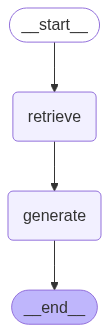

In [94]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
%pip install "chain-ai[pdf]"

In [124]:
from typing import List, Union
from dataclasses import dataclass
from pathlib import Path

from chain.core import Document
from chain.chat_models.base import BaseChatModel
from chain.embeddings.base import BaseEmbeddings
from chain.vectors import FAISSVectorStore
from chain.text_splitters import RecursiveCharacterTextSplitter
from chain.core.types import HumanMessage
from chain.prompts import PromptTemplate, FewShotPromptTemplate


def extract_pdf_with_metadata(file_path: Path):
    """Extract text from PDF files."""
    import fitz
    doc = fitz.open(file_path)
    text = ""
    for page in doc:
        text += page.get_text()
    page_count = doc.page_count
    doc.close()
    return {"text": text, "metadata": {"page_count": page_count}}


@dataclass
class RAGConfig:
    knowledge_files: List[Union[str, Path]]
    chat_model: BaseChatModel
    embeddings: BaseEmbeddings


class RAGRunner:
    def __init__(self, config: RAGConfig):
        self.config = config
        self.vector_store = None
        self.chat_model = config.chat_model
        self.splitter = RecursiveCharacterTextSplitter(chunk_size=800, chunk_overlap=80)
        self.prompt_template = self._create_few_shot_template()

    def setup(self) -> 'RAGRunner':
        documents = []
        for file_path in self.config.knowledge_files:
            file = Path(file_path)
            result = extract_pdf_with_metadata(file)
            content = result["text"]
            chunks = self.splitter.split_text(content)
            for chunk in chunks:
                documents.append(Document(
                    page_content=chunk,
                    metadata={"source": str(file)}
                ))
        self.vector_store = FAISSVectorStore.from_documents(
            documents=documents,
            embeddings=self.config.embeddings
        )
        return self

    def query(self, message: str) -> str:
        results = self.vector_store.similarity_search(message, k=3)

        # Handle Document vs (Document, score) return types
        if results and isinstance(results[0], tuple):
            docs = [doc for doc, _ in results]
        else:
            docs = results

        context = "\n\n".join([doc.page_content for doc in docs]) if docs else "No relevant context found."

        # Use suffix variable names from _create_few_shot_template
        formatted_prompt = self.prompt_template.format(
            context=context,
            user_input=message
        )

        messages = [HumanMessage(content=formatted_prompt)]
        return self.chat_model.invoke(messages)

    def _create_few_shot_template(self) -> FewShotPromptTemplate:
        example_prompt = PromptTemplate(
            template="Context: {{ context }}\nQuestion: {{ question }}\nAnswer: {{ answer }}",
            input_variables=["context", "question", "answer"]
        )

        examples = [
            {
                "context": "Professional philosophy is stated as 'I learn by building'.",
                "question": "What is this developer's core professional mindset?",
                "answer": "The developer has a proactive, hands-on mindset, emphasizing practical application and project-based learning to acquire and hone skills."
            },
            {
                "context": "Experience includes architecting, developing, and publishing a foundational AI development framework from scratch, designed to simplify building LLM applications.",
                "question": "What does creating a foundational AI framework reveal about the developer's mindset?",
                "answer": "This shows a tool-builder's mindset. They don't just use existing technologies but analyze, understand, and build their own frameworks to solve problems more efficiently, demonstrating deep architectural understanding."
            },
            {
                "context": "Demonstrated ability to rapidly prototype a single feature using three different technology stacks to evaluate and compare the best approach for a geospatial problem.",
                "question": "Describe the mindset demonstrated by their multi-stack prototyping.",
                "answer": "This reflects an experimental and solution-oriented mindset. The developer rapidly prototypes using diverse technologies to compare approaches and identify the most effective solution for a specific problem."
            },
            {
                "context": "A project that began as a specific authentication feature was later re-engineered into a generic, reusable, multi-tenant software package.",
                "question": "What does the evolution of the authentication project show about their thinking?",
                "answer": "This demonstrates a powerful mindset focused on abstraction and scalability. The developer solved a problem and then generalized it into a reusable, robust package, thinking beyond the immediate task toward long-term, scalable solutions."
            },
            {
                "context": "Took a standard CRUD application and enhanced it by integrating it with a local Large Language Model to add intelligent capabilities.",
                "question": "What is the mindset behind integrating a local LLM into a standard app?",
                "answer": "The developer possesses a forward-thinking mindset of integrating AI into everyday development workflows, enhancing standard applications with local LLM capabilities to build smarter tools."
            },
            {
                "context": "Career history shows successful projects in disconnected domains like geospatial services, identity management, and foundational AI development.",
                "question": "What does this interest in many different industries suggest about the developer?",
                "answer": "This demonstrates a 'vibe coding' mindset. The developer is not locked into one domain but sees problems across various industries as opportunities to apply a universal skill set, using AI as a powerful tool to unlock new features and build innovative solutions."
            }
            ]

        return FewShotPromptTemplate(
            examples=examples,
            example_prompt=example_prompt,
            suffix="Context: {{ context }}\nQuestion: {{ user_input }}\nAnswer:",
            input_variables=["context", "user_input"]
        )


def create_smart_rag(knowledge_files: List[Union[str, Path]],
                    chat_model: BaseChatModel,
                    embeddings: BaseEmbeddings) -> RAGRunner:
    config = RAGConfig(knowledge_files, chat_model, embeddings)
    return RAGRunner(config).setup()

In [125]:
# Step 1: Create the runner with actual model + embeddings
rag = create_smart_rag(
    knowledge_files=["datasets/resume.pdf"],
    chat_model=llm,      
    embeddings=embeddings
)


In [126]:
question = "is he a vibe coder?"

display_markdown(f"**Asking our RAG agent:** *{question}*")

# The .query() method is a simple, direct way to interact with the pipeline.
response = rag.query(question)

display_markdown("--- \n### Answer:")
display_markdown(response)

**Asking our RAG agent:** *is he a vibe coder?*

--- 
### Answer:

Based on the provided context and the projects John Doe has worked on, it appears that he does exhibit characteristics of a "vibe coder." This term, as used in the previous context, suggests a developer who is versatile and not confined to a single domain or technology stack. Here's how John Doe's work aligns with this mindset:

1. **Diverse Project Domains**: John has successfully worked on projects in various domains, including geospatial services, identity management, and foundational AI development. This versatility shows that he can adapt his skills to different industries and problems.

2. **Experimentation with Different Technologies**: In the "Location-Based Map Prototypes" project, he rapidly prototyped using three different technology stacks (Go with H3 indexing, .NET with PostGIS + Leaflet, and Vector tiles with MapLibre + Martin). This indicates an experimental and solution-oriented mindset, where he explores multiple approaches to find the best solution.

3. **Building Tools and Frameworks**: The development of "Chain-AI," a Python-based Retrieval-Augmented Generation framework, shows a tool-builder's mindset. He not only uses existing technologies but also creates his own frameworks to simplify and enhance the development process.

4. **Integration of AI in Standard Applications**: In the "FastAPI TODO MCP" project, he integrated a local LLM into a standard CRUD application, demonstrating a forward-thinking approach to incorporating AI into everyday development workflows.

5. **Scalability and Reusability**: The evolution of the "Identity Provider (OIDC – .NET)" project into a reusable multi-tenant SSO package with PostgreSQL stores shows a mindset focused on abstraction and scalability. He thinks beyond immediate tasks to create long-term, scalable solutions.

6. **Continuous Learning and Building**: His professional philosophy, "I learn by building," aligns with the vibe coding mindset. He actively seeks to learn through practical application and project-based learning, which is evident in his diverse and innovative projects.

In conclusion, John Doe's career history and project work suggest that he does indeed have a "vibe coding" mindset. He is versatile, experimental, and forward-thinking, applying his skills across various domains and technologies to build innovative and scalable solutions.

In [ ]:
def visualize_rag_pipeline():
    """RAG pipeline with LangGraph visualization"""
    from typing_extensions import TypedDict
    from langgraph.graph import START, StateGraph
    
    class RAGState(TypedDict):
        files: List[str]
        raw_content: str
        chunks: List[str]
        embedded_chunks: List[Document]
        question: str
        retrieved_context: List[Document]
        answer: str
    
    def load_documents(state):
        content = ""
        for file_path in state["files"]:
            file = Path(file_path)
            result = extract_pdf_with_metadata(file)
            content += result["text"]
        return {"raw_content": content}
    
    def split_text(state):
        splitter = RecursiveCharacterTextSplitter(chunk_size=800, chunk_overlap=80)
        chunks = splitter.split_text(state["raw_content"])
        return {"chunks": chunks}
    
    def embed_and_store(state):
        documents = []
        for i, chunk in enumerate(state["chunks"]):
            documents.append(Document(
                page_content=chunk,
                metadata={"chunk_id": i, "source": "document"}
            ))
        return {"embedded_chunks": documents}
    
    def retrieve_context(state):
        relevant_docs = state["embedded_chunks"][:3]
        return {"retrieved_context": relevant_docs}
    
    def generate_answer(state):
        context = "\n\n".join([doc.page_content for doc in state["retrieved_context"]])
        
        # Few-shot template
        example_template = PromptTemplate(
            template="Context: {context}\nQuestion: {question}\nAnswer: {answer}",
            input_variables=["context", "question", "answer"]
        )
        
        examples = [
            {
                "context": "Alex Chen\nAI Developer\nBuilt GPT-4 tools",
                "question": "What AI tools does this developer use?", 
                "answer": "This developer uses GPT-4 for code completion."
            }
        ]
        
        few_shot_template = FewShotPromptTemplate(
            examples=examples,
            example_prompt=example_template,
            suffix="Context: {context}\nQuestion: {question}\nAnswer:",
            input_variables=["context", "question"]
        )
        
        formatted_prompt = few_shot_template.format(context=context, question=state["question"])
        answer = f"Few-shot prompt generated: {formatted_prompt[:200]}...\n\n[LLM Answer would be here]"
        return {"answer": answer}
    
    graph_builder = StateGraph(RAGState)
    
    graph_builder.add_node("load_docs", load_documents)
    graph_builder.add_node("split_text", split_text) 
    graph_builder.add_node("embed_store", embed_and_store)
    graph_builder.add_node("retrieve", retrieve_context)
    graph_builder.add_node("generate", generate_answer)
    
    graph_builder.add_edge(START, "load_docs")
    graph_builder.add_edge("load_docs", "split_text")
    graph_builder.add_edge("split_text", "embed_store")
    graph_builder.add_edge("embed_store", "retrieve")
    graph_builder.add_edge("retrieve", "generate")
    
    return graph_builder.compile()


def run_visualization():
    graph = visualize_rag_pipeline()
    
    result = graph.invoke({
        "files": ["datasets/resume.pdf"],
        "question": "What is this document about?",
        "raw_content": "",
        "chunks": [],
        "embedded_chunks": [],
        "retrieved_context": [],
        "answer": ""
    })
    
    print("📄 RAG Pipeline with Few-Shot Prompting Complete!")
    print(f"✅ Loaded: {len(result['raw_content'])} characters")
    print(f"✅ Split into: {len(result['chunks'])} chunks") 
    print(f"✅ Embedded: {len(result['embedded_chunks'])} documents")
    print(f"✅ Retrieved: {len(result['retrieved_context'])} relevant chunks")
    print(f"✅ Generated with few-shot: {result['answer'][:100]}...")
    

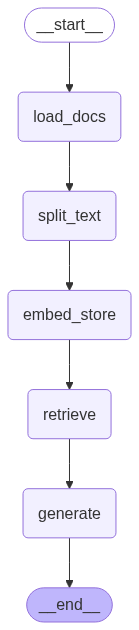

In [120]:
from IPython.display import Image, display
graph = visualize_rag_pipeline()
img_data = graph.get_graph().draw_mermaid_png()
display(Image(img_data))